In [1]:
from dishonest_casino import dishonest_casino_play
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [6]:
fair_prob = [1./6, 1./6, 1./6, 1./6, 1./6, 1./6]
unfair_prob = [1./10, 1./10, 1./10, 1./10, 1./10, 1./2]
switch_to_loaded_dice_prob = 0.05
switch_to_fair_dice_prob = 0.1
n = 200

In [7]:
h, v = dishonest_casino_play(n=n, fair_prob=fair_prob, unfair_prob=unfair_prob,
                             prob_switch_to_unfair=switch_to_loaded_dice_prob,
                             prob_switch_to_fair=switch_to_fair_dice_prob)

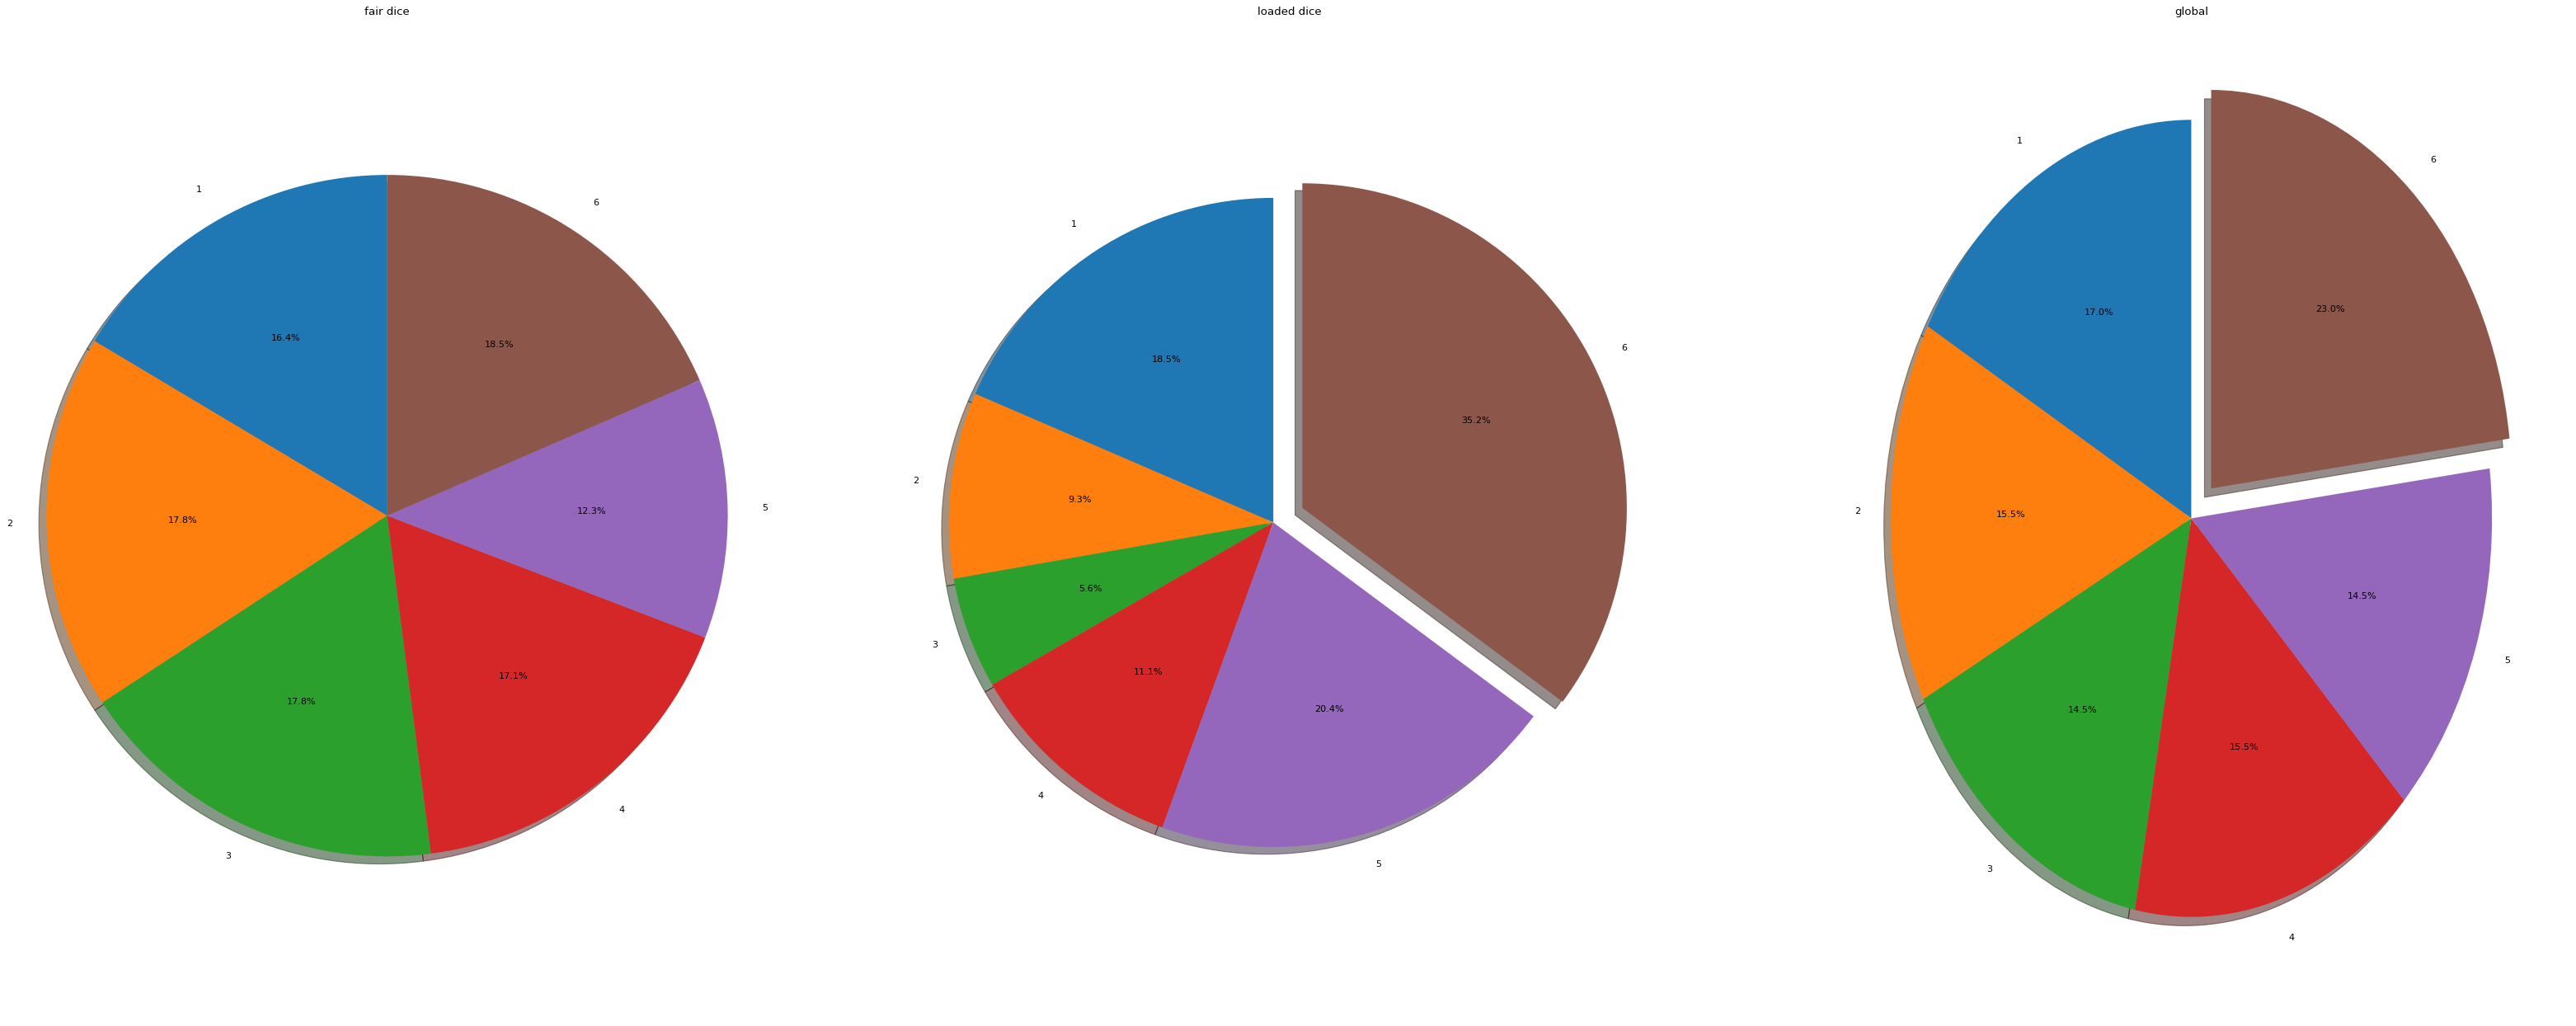

In [8]:
x = np.arange(1, len(h) + 1, 1)
v = np.array(v)
h = np.array(h)

possible_values = [1, 2, 3, 4, 5, 6]
values_fair_dice = v[h==0]
freq_fair_dice = [sum(values_fair_dice==i) for i in possible_values]
values_loaded_dice = v[h==1]
freq_loaded_dice = [sum(values_loaded_dice==i) for i in possible_values]
freq_global = [sum(v == i) for i in possible_values]

values = [1, 2, 3, 4, 5, 6]
explode = (0, 0, 0, 0, 0, 0.1)

fig = plt.figure(figsize=(50, 20), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(131)
ax1.pie(freq_fair_dice, labels=values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("fair dice")

#explode = (0, 0.1) 
ax2 = fig.add_subplot(132)
ax2.pie(freq_loaded_dice, explode=explode, labels=values, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title("loaded dice")

ax3 = fig.add_subplot(133)
ax3.pie(freq_global, explode=explode, labels=values, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax3.set_title("global")

plt.show()

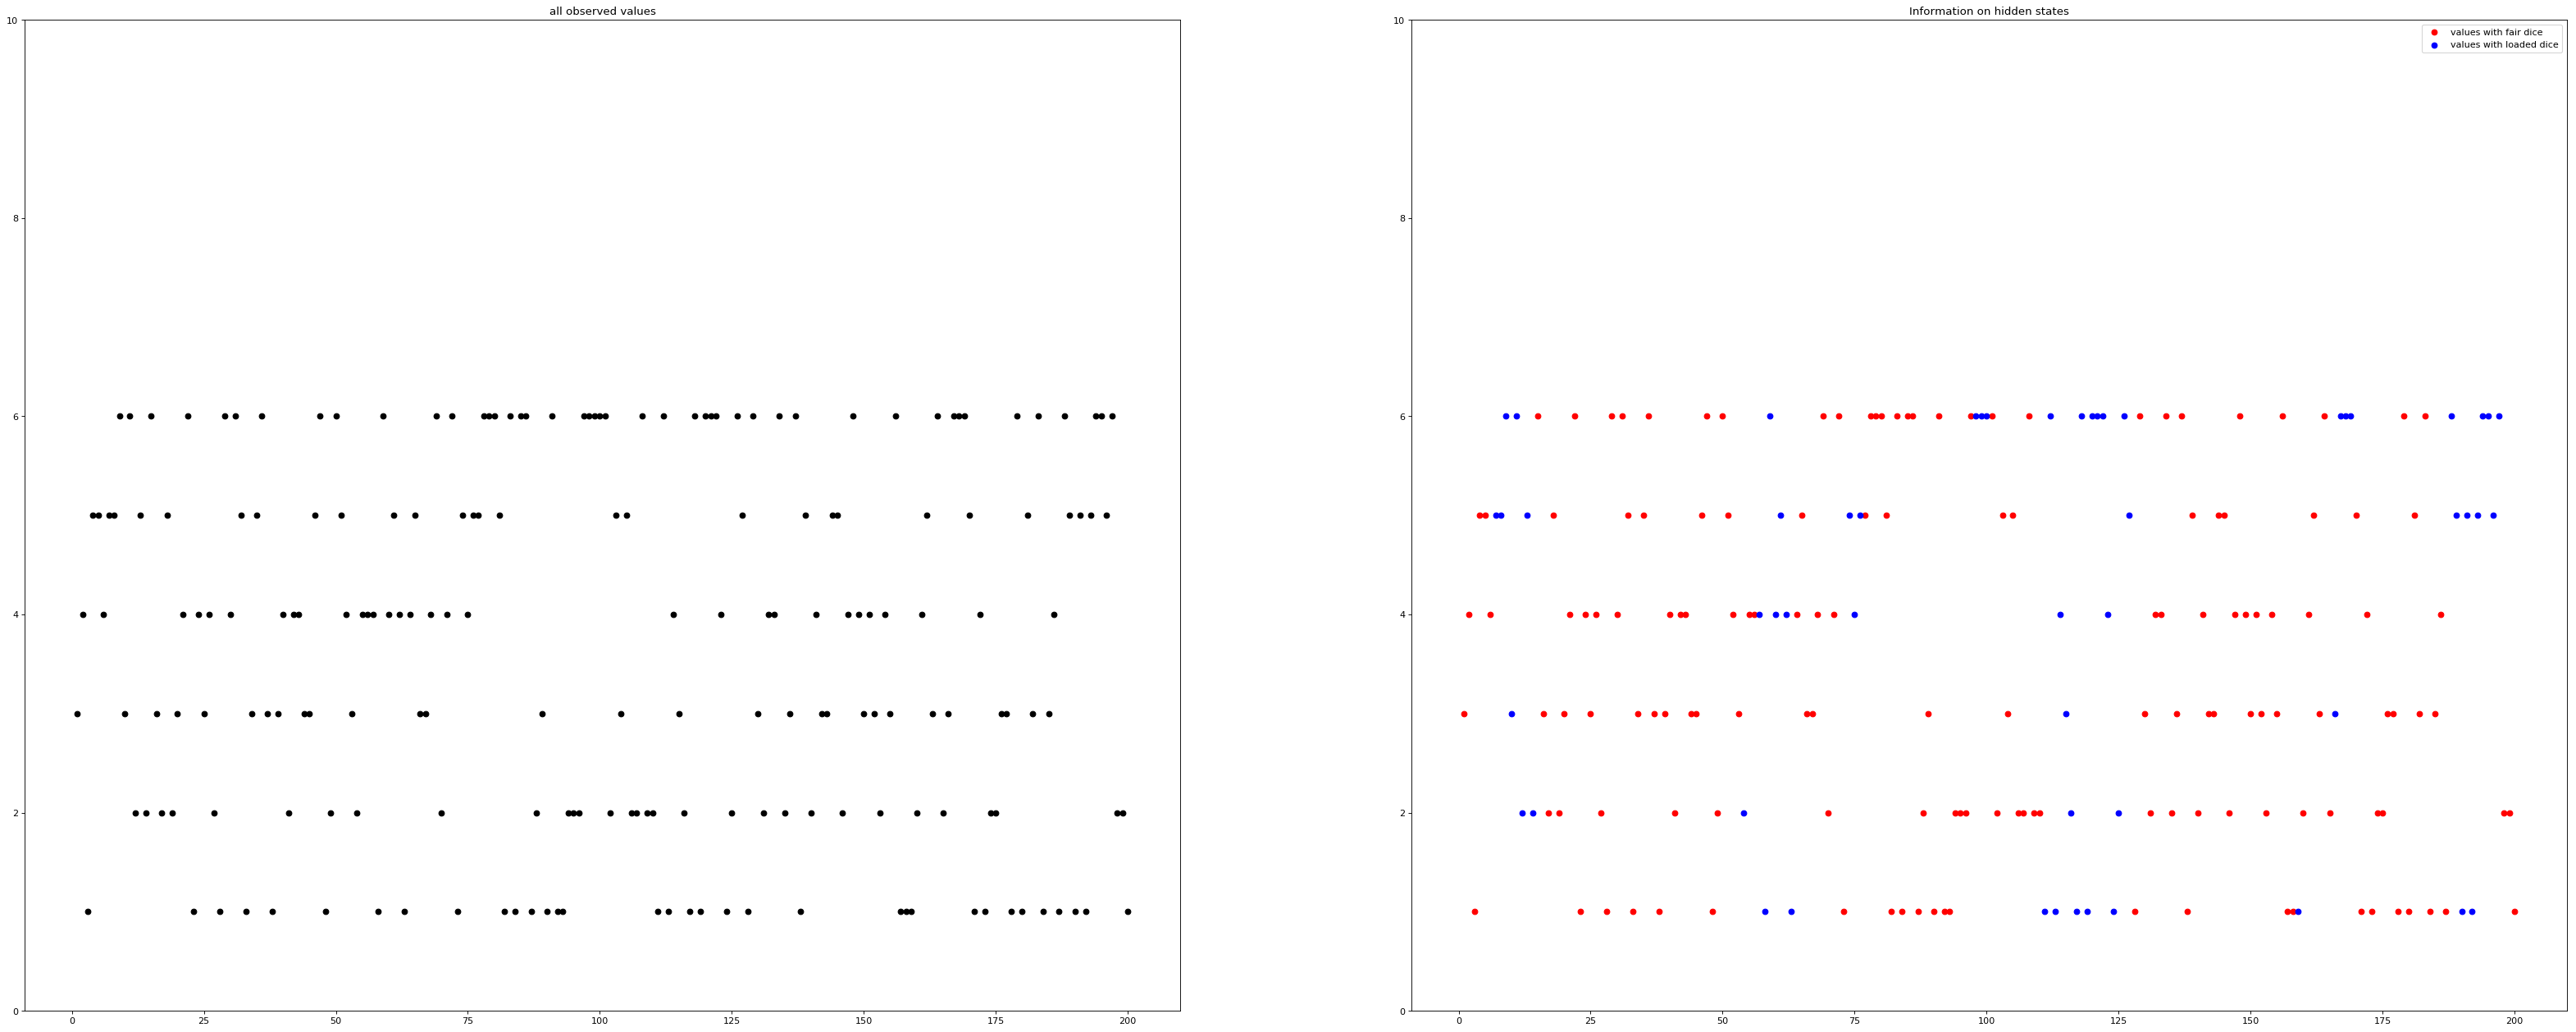

In [9]:
fig = plt.figure(figsize=(50, 20), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax1.scatter(x, v, color='k', label='observed values')
ax1.set_title('all observed values')
ax1.set_ylim(0, 10)
ax2 = fig.add_subplot(122)
ax2.scatter(x[h==0], v[h==0], color='r', label='values with fair dice')
ax2.scatter(x[h==1], v[h==1], color='b', label='values with loaded dice')
ax2.set_ylim(0, 10)
ax2.set_title('Information on hidden states')
plt.legend(loc='best')
plt.show()